In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
latent_dim = 64

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation = 'relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation = 'sigmoid'),
            layers.Reshape((28,28))
        ])
        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Autoencoder(latent_dim)

In [7]:
autoencoder.compile(optimizer='Adam', loss= losses.MeanSquaredError())

In [8]:
autoencoder.fit(x_train,x_train, epochs=10, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0240 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [9]:
encoded_img = autoencoder.encoder(x_test)

In [10]:
decoded_img = autoencoder.decoder(encoded_img)

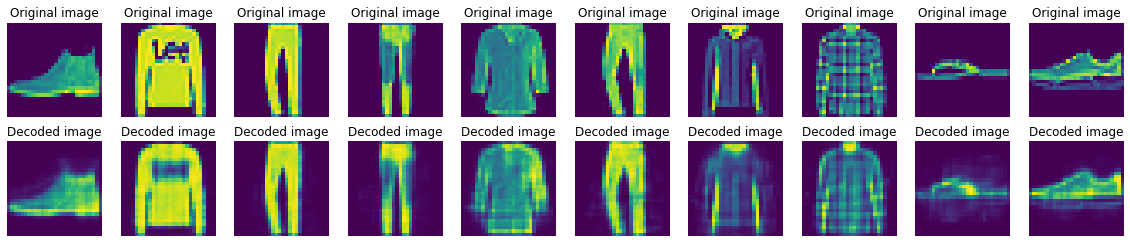

In [11]:
n = 10

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.title('Original image')
    ax.axis('off')
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(decoded_img[i])
    plt.title('Decoded image')
    ax.axis('off')
plt.show()

# Image Denoising

In [12]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import layers,losses

In [14]:
from tensorflow.keras.datasets import fashion_mnist

In [15]:
(x_train, _),(x_test, _) = fashion_mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0

In [19]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [20]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [21]:
noise_data = 0.2

x_train_noisy = x_train + noise_data * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_data * tf.random.normal(shape= x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min= 0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


In [22]:
import matplotlib.pyplot as plt

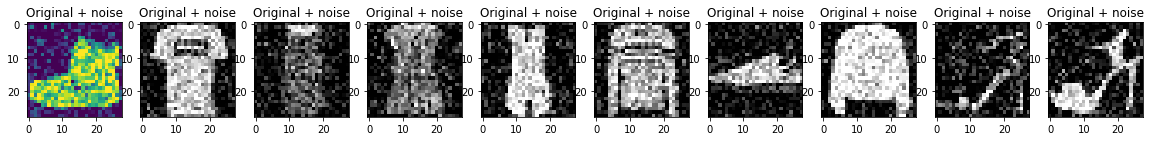

In [23]:
n = 10 

plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title('Original + noise')
    ax.imshow(tf.squeeze(x_train_noisy[i]))  #squeeze funtion will retain remaining data same after removing one dimension
    plt.gray()
plt.show()
    

In [24]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(16, (3,3), activation ='relu', padding='same', strides=2),
            layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation ='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()

autoencoder.compile(optimizer= 'adam', loss= losses.MeanSquaredError())

In [25]:
print(x_train_noisy.shape)
print(x_train.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [26]:
autoencoder.fit(x_train_noisy, x_train, shuffle=True,epochs=10, validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0170 - val_loss: 0.0102
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 39s 21m

In [27]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [28]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [29]:
encoder_img = autoencoder.encoder(x_test)
decoder_img = autoencoder.decoder(encoder_img)

In [30]:
import matplotlib.pyplot as plt

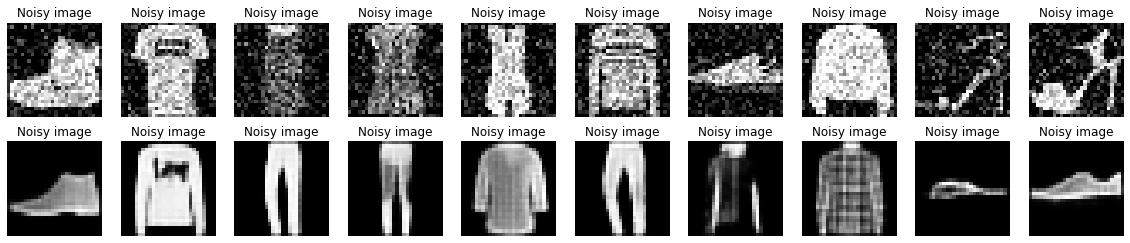

In [31]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    ax.imshow(tf.squeeze(x_train_noisy[i]))
    plt.title('Noisy image')
    ax.axis('off')
    plt.gray()
    
    ax = plt.subplot(2, n, i+n+1)
    ax.imshow(tf.squeeze(decoder_img[i]))
    plt.title('Noisy image')
    ax.axis('off')
    plt.gray()
plt.show()

In [32]:
from tensorflow.keras.datasets import mnist

In [33]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
y_train.shape

(60000,)

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
y_test.shape

(10000,)

In [38]:
from sklearn.datasets import load_digits

In [39]:
data = load_digits()

In [40]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [41]:
data.data.shape  #8x8 images 

(1797, 64)

In [42]:
import matplotlib.pyplot as plt

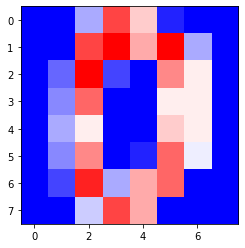

In [43]:
plt.imshow(data.images[0] , cmap='bwr')
plt.show()